In [1]:
# importing packages
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import emission

import yt
# Load the dataset.
#ds = yt.load("/Users/bnowicki/Documents/Research/Ricotti/output_00273")

#print(dir(ds.fields.gas))

'''
cell_fields = [
    "Density",
    "x-velocity",
    "y-velocity",
    "z-velocity",
    "Pressure",
    "Metallicity",
    # "dark_matter_density",
    "xHI",
    "xHII",
    "xHeII",
    "xHeIII",
]
epf = [
    ("particle_family", "b"),
    ("particle_tag", "b"),
    ("particle_birth_epoch", "d"),
    ("particle_metallicity", "d"),
]
'''
def _ion_param(field, data): 
    photon=data['ramses-rt', 'Photon_density_1']+data['ramses-rt', 'Photon_density_2'] + data['ramses-rt', 'Photon_density_3'] + data['ramses-rt', 'Photon_density_4']

    return photon/data['gas', 'number_density']  

yt.add_field(
    ('gas', 'ion-param'), 
    function=_ion_param, 
    sampling_type="cell", 
    units="cm**3", 
    force_override=True
)

def _halpha_emission(field, data):
    interpolator=emission.get_interpolator(0)
    # change to log values
    U = np.log10(data['gas', 'ion-param'].value)
    N = np.log10(data['gas', 'number_density'].value)
    T = np.log10(data['gas', 'temperature'].value)

    Uadj = np.where(U < -6.0, -6.0, U)
    Uadj = np.where(Uadj > 1.0, 1.0, Uadj)

    Nadj = np.where(N < -1.0, -1.0, N)
    Nadj = np.where(Nadj > 6.0, 6.0, Nadj)

    Tadj = np.where(T < 3.0, 3.0, T)
    Tadj = np.where(Tadj > 6.0, 6.0, Tadj)
    
    tup = np.stack((Uadj, Nadj, Tadj), axis=-1)
    return interpolator(tup)*data['gas', 'number_density']**2

yt.add_field(
    ('gas', 'halpha_emission'),
    function=_halpha_emission,
    sampling_type='cell',
    #units='erg cm**-2 s**-1',
    units='1/cm**6',
    #dimension=dimensions,
    force_override=True
)


f1 = "/Users/bnowicki/Documents/Research/Ricotti/output_00273"

#ds = yt.load(f1, fields=cell_fields, extra_particle_fields=epf)

#p = yt.ProjectionPlot(ds, "z", ("gas", "number_density"), width=0.0001,
#                      weight_field=("gas", "number_density"),
#                      buff_size=(1000, 1000),
#                      center=[0.49118094, 0.49275361, 0.49473726])

#p.show()
#ds.fields

ds = yt.load("/Users/bnowicki/Documents/Research/Ricotti/output_00273")

'''
p = yt.ProjectionPlot(ds, "z", ("gas", "ion-param"), width=0.0001,
                      weight_field=("gas", "number_density"),
                      buff_size=(1000, 1000),
                      center=[0.49118094, 0.49275361, 0.49473726])

p.show()
'''
#ds.fields
#-6.0 1.0 0.5 -1.0 6.0 0.5 3.0 6.0 0.1

#interpolator=emission.get_interpolator(0)
#print(interpolator([[0.0, 3.0, 4.0], [0.5, 3.2, 4.7]]))
#ad = ds.all_data()
#print(ad['gas', 'ion-param'].value)

ds.fields


-6.0 1.0 0.5 -1.0 6.0 0.5 3.0 6.0 0.1
(25, 6975)
15 15 31


yt : [INFO     ] 2024-09-26 16:54:04,237 Parameters: current_time              = 4.311420483661945
yt : [INFO     ] 2024-09-26 16:54:04,238 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2024-09-26 16:54:04,238 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-09-26 16:54:04,238 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2024-09-26 16:54:04,238 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2024-09-26 16:54:04,239 Parameters: current_redshift          = 12.171087046255657
yt : [INFO     ] 2024-09-26 16:54:04,239 Parameters: omega_lambda              = 0.685000002384186
yt : [INFO     ] 2024-09-26 16:54:04,239 Parameters: omega_matter              = 0.314999997615814
yt : [INFO     ] 2024-09-26 16:54:04,239 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2024-09-26 16:54:04,239 Parameters: hubble_constant           = 0.674000015258789
yt : [INFO     ] 2024-09-26 16:54:04,246 Detected RAMSES-RT 

/var/folders/rh/cscbbcyd02lfdp3qqy7mdmjm0000gn/T/ipykernel_95710/2175248983.py:53: RuntimeWarning: divide by zero encountered in log10
  T = np.log10(data['gas', 'temperature'].value)
yt : [INFO     ] 2024-09-26 16:54:36,034 Projection completed
yt : [INFO     ] 2024-09-26 16:54:36,037 xlim = 0.491131 0.491231
yt : [INFO     ] 2024-09-26 16:54:36,038 ylim = 0.492704 0.492804
yt : [INFO     ] 2024-09-26 16:54:36,039 xlim = 0.491131 0.491231
yt : [INFO     ] 2024-09-26 16:54:36,039 ylim = 0.492704 0.492804
yt : [INFO     ] 2024-09-26 16:54:36,040 Making a fixed resolution buffer of (('gas', 'halpha_emission')) 1000 by 1000



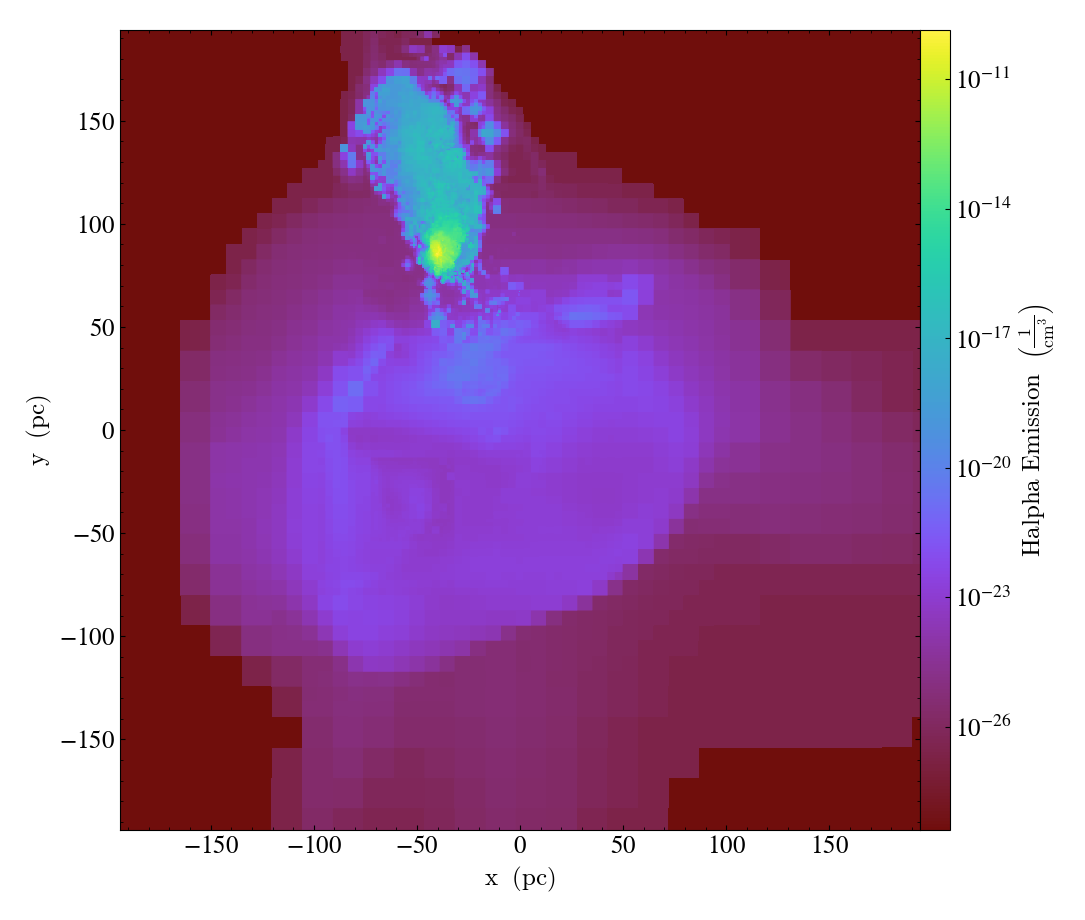

In [2]:
p = yt.ProjectionPlot(ds, "z", ("gas", "halpha_emission"), width=0.0001,
                      weight_field=("gas", "number_density"),
                      buff_size=(1000, 1000),
                      center=[0.49118094, 0.49275361, 0.49473726])

p.show()

In [8]:
print(ad['gas', 'ion-param'].value.shape)
U = np.log10(ad['gas', 'ion-param'].value)
N = np.log10(ad['gas', 'number_density'].value)
T = np.log10(ad['gas', 'temperature'].value+1)
tup = np.stack((U, N, T), axis=-1)
print(tup.shape)

interpolator=emission.get_interpolator(0)
print(np.min(U), np.max(U))
print(np.min(N), np.max(N))
print(np.min(T), np.max(T))
print(np.min(ad['gas', 'temperature'].value))

#interpolator(tup)
# Temp floor (3K), U floor if out of bound

Uadj = np.where(U < -6.0, -6.0, U)
Uadj = np.where(Uadj > 1.0, 1.0, Uadj)
print(np.min(Uadj), np.max(Uadj))
#Uadj = np.where(U < -6.0, -6.0, U)

Nadj = np.where(N < -1.0, -1.0, N)
Nadj = np.where(Nadj > 6.0, 6.0, Nadj)
print(np.min(Nadj), np.max(Nadj))

Tadj = np.where(T < 3.0, 3.0, T)
Tadj = np.where(Tadj > 6.0, 6.0, Tadj)
print(np.min(Tadj), np.max(Tadj))

(12345208,)
(12345208, 3)
-29.380686211407248 -0.3480182040519466
-7.763204109596464 5.145327560266329
0.0 9.389423033954266
0.0
-6.0 -0.3480182040519466
-1.0 5.145327560266329
3.0 6.0
